**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd

In [3]:
#Loading data

book = pd.read_csv("books.csv", sep=";", error_bad_lines= False, encoding="latin-1")
book.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines= False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines= False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [5]:
book.shape

(271360, 8)

In [6]:
users.shape

(278858, 3)

In [7]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [8]:
book.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [10]:
# Dropping the last three columns.

book.drop(columns = ['imageUrlS','imageUrlM','imageUrlL'],inplace = True)

In [13]:
# Verifying the change.

book.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
# Checking the shape to confirm the change. 

book.shape

(271360, 5)

**yearOfPublication**

### Check unique values of yearOfPublication


In [16]:
book.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
book.shape

(271360, 5)

1) As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [18]:
book[book['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [19]:
book[book['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [20]:
book.drop([209538,221678,220731],inplace=True)

In [21]:
book.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Successsfully dropped.

### Change the datatype of yearOfPublication to 'int'

In [22]:
book['yearOfPublication']=book['yearOfPublication'].astype('int')

In [23]:
book.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [24]:
book[book.publisher.isna() == True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [25]:
book.publisher.dropna(inplace = True)

In [26]:
book.publisher.isna().sum()

0

In [27]:
book.shape

(271357, 5)

## Exploring Users dataset

In [28]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [29]:
users.Age.sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above.

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [30]:
# Replacing the values below 5 and above 90 with Nan values.

import numpy as np
i = users[users.Age<5]
users.replace(i,np.NaN,inplace=True)
j = users[users.Age>90]
users.replace(j,np.NaN,inplace=True)

### Replace null values in column `Age` with mean

In [31]:
# Replacing Nan values with mean.

users.replace(np.nan,users.Age.mean(),inplace=True)

In [32]:
# Verifying the change.

users.Age.sort_values().unique()

array([ 5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
       10.        , 11.        , 12.        , 13.        , 14.        ,
       15.        , 16.        , 17.        , 18.        , 19.        ,
       20.        , 21.        , 22.        , 23.        , 24.        ,
       25.        , 26.        , 27.        , 28.        , 29.        ,
       30.        , 31.        , 32.        , 33.        , 34.        ,
       34.72384042, 35.        , 36.        , 37.        , 38.        ,
       39.        , 40.        , 41.        , 42.        , 43.        ,
       44.        , 45.        , 46.        , 47.        , 48.        ,
       49.        , 50.        , 51.        , 52.        , 53.        ,
       54.        , 55.        , 56.        , 57.        , 58.        ,
       59.        , 60.        , 61.        , 62.        , 63.        ,
       64.        , 65.        , 66.        , 67.        , 68.        ,
       69.        , 70.        , 71.        , 72.        , 73.  

### Change the datatype of `Age` to `int`

In [33]:
users.Age = users.Age.astype('int')

In [34]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [35]:
ratings.shape

(1149780, 3)

In [38]:
n_users = users.shape[0]
n_book = book.shape[0]

In [31]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [39]:
ratings.bookRating.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [41]:
book_rec= pd.merge(ratings,book,on ='ISBN')
book_rec.shape[0]

1031132

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [42]:
user_rec=pd.merge(book_rec,users,on='userID')
user_rec.shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


1026153

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [46]:
rating = user_rec[user_rec['bookRating']>=1]

In [47]:
rating.shape

(382116, 9)

### Find out which rating has been given highest number of times

The rating 8 has been given the highest number of times.


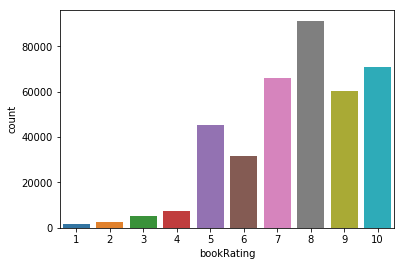

In [48]:
import seaborn as sns
%matplotlib inline
from statistics import mode
sns.countplot(data=rating,x='bookRating')
print("The rating % s has been given the highest number of times." % (mode(rating['bookRating'])))

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [49]:
c = rating['userID'].value_counts()
c

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
260876       1
232194       1
234241       1
262899       1
269040       1
89029        1
6768         1
82886        1
162620       1
179129       1
38103        1
185268       1
24813        1
242584       1
89326        1
27518        1
31612        1
17275        1
152484       1
883          1
54121        1
56168        1
189362       1
43878        1
45925        1
35682        1
86873        1
88920        1
80724        1
205028       1
Name: userID, Length: 67796, dtype: int64

In [51]:
rating = rating[rating['userID'].isin(c[c>=100].index)]

In [52]:
rating.shape

(102977, 9)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [53]:
rating.isnull().sum()

userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            2
Location             0
Age                  0
dtype: int64

In [54]:
rating[rating['publisher'].isna()==True]

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
9752,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,"morrow, georgia, usa",52
9761,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,"morrow, georgia, usa",52


In [55]:
rating.loc[9752,'publisher']= 0
rating.loc[9761,'publisher']= 0

In [56]:
rating.isnull().sum()

userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
Location             0
Age                  0
dtype: int64

In [57]:
rating

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa",34
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa",34
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa",34
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa",34
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa",34
56,6543,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,"strafford, missouri, usa",34
62,6543,0345436911,8,The Dress Lodger (Ballantine Reader's Circle),Sheri Holman,2001,Ballantine Books,"strafford, missouri, usa",34
63,6543,038548951X,10,Sister of My Heart,Chitra Banerjee Divakaruni,2000,Anchor Pub,"strafford, missouri, usa",34
64,6543,0399149562,6,Short &amp; Tall Tales: Moose County Legends C...,Lilian Jackson Braun,2002,Putnam Publishing Group,"strafford, missouri, usa",34
66,6543,0553574566,8,A Monstrous Regiment of Women,LAURIE R. KING,1996,Bantam,"strafford, missouri, usa",34


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [58]:
rating_piv=rating.pivot(index='userID',columns='ISBN',values='bookRating').fillna(0)
rating_piv

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from scipy.sparse.linalg import svds
U,sigma,vt=svds(rating_piv,k=50)

In [60]:
sigma

array([147.90973414, 149.34003703, 150.07388545, 152.19913946,
       152.87117482, 154.61236751, 154.78181492, 155.95364544,
       158.05611164, 159.20779927, 159.81356834, 162.01850373,
       162.77195774, 163.32748458, 166.02209035, 166.81339422,
       168.0412899 , 170.77476488, 171.01291334, 173.29117307,
       174.56322353, 176.64634881, 178.61901951, 180.29240787,
       182.24879961, 184.10546734, 187.61172152, 189.75155209,
       190.96969049, 195.14472184, 199.8257129 , 201.70082028,
       202.18680495, 203.4855925 , 207.26046056, 209.91587018,
       213.23541263, 216.87913486, 224.26847617, 231.66159393,
       235.6704907 , 249.94820839, 252.02436313, 261.22776382,
       267.96643064, 281.00413233, 293.69384539, 379.58246344,
       634.73977644, 680.4093915 ])

In [61]:
sigma = np.diag(sigma)

In [62]:
sigma

array([[147.90973414,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34003703,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07388545, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58246344,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.73977644,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.4093915 ]])

In [63]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), vt)
all_users_predicted_ratings.shape

(447, 66425)

In [64]:
preds_df = pd.DataFrame(all_users_predicted_ratings,columns=rating_piv.columns)
preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025351,-0.002174,-1.449351e-03,-0.002174,-0.002174,0.002987,-0.003932,0.007030,0.007030,0.012337,...,0.000181,0.000227,0.042173,-0.016820,-0.080208,0.004754,0.028294,0.000121,-0.001675,0.067534
1,-0.010009,-0.003679,-2.452348e-03,-0.003679,-0.003679,0.001078,0.001443,-0.003501,-0.003501,0.001613,...,-0.000363,0.000401,0.008203,0.001094,-0.029222,0.000997,0.002360,-0.000242,0.000030,-0.013055
2,-0.015075,-0.015525,-1.035012e-02,-0.015525,-0.015525,0.007305,-0.013975,0.011954,0.011954,0.011908,...,-0.000448,0.001923,0.047933,0.005715,0.118426,0.006996,0.003137,-0.000299,0.009068,-0.057819
3,-0.021511,0.035632,2.375452e-02,0.035632,0.035632,0.030263,0.024294,-0.000977,-0.000977,0.067608,...,0.002977,0.009925,0.085647,-0.008699,0.017034,0.028873,-0.000043,0.001985,0.031172,-0.046818
4,0.002056,-0.008016,-5.343968e-03,-0.008016,-0.008016,0.002961,0.003092,0.000234,0.000234,0.006160,...,0.002124,0.001608,-0.012244,0.009408,0.673978,0.002632,-0.008211,0.001416,0.004959,0.047685
5,-0.002058,0.018564,1.237571e-02,0.018564,0.018564,0.007980,0.023048,-0.005154,-0.005154,0.018380,...,0.002283,0.003353,0.029701,-0.013447,-0.069210,0.008115,0.003353,0.001522,0.008556,0.071974
6,-0.015933,0.020214,1.347632e-02,0.020214,0.020214,0.014193,0.016832,-0.002317,-0.002317,0.031548,...,0.002600,0.003678,0.029862,0.012476,0.030532,0.013615,0.001338,0.001734,0.014236,-0.004653
7,-0.010886,-0.010137,-6.758132e-03,-0.010137,-0.010137,0.023419,-0.014115,0.017085,0.017085,0.057250,...,0.000150,0.006798,0.121775,-0.000694,-0.318838,0.018899,0.045587,0.000100,0.014987,0.012382
8,0.040918,-0.030353,-2.023520e-02,-0.030353,-0.030353,0.018474,-0.031519,-0.013258,-0.013258,0.037920,...,0.002074,0.005266,0.070298,0.007829,-0.076734,0.014382,0.005951,0.001382,0.016549,-0.027365
9,0.023400,-0.004289,-2.859076e-03,-0.004289,-0.004289,0.054470,-0.015464,-0.011686,-0.011686,0.115240,...,0.006637,0.012716,0.171843,-0.010908,-0.173464,0.050013,0.012944,0.004425,0.052008,-0.024220


In [68]:
def recommend_books(predictions_df, user_id,userID, books_df, original_ratings_df, num_recommendations = False):
    user_row_number = user_id #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data1 = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data1.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    
    # Books that user has read, rated and using dropna() finding count of books that are not read before as rating is nan
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    
    #printing how many books to recommend 
    
    print('Recommending the highest {0} predicted ratings book not already rated.'.format(num_recommendations))
    
    
    # finding the predictions by comparing original data with predictions outputs 
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                       
                       #sort the predictions 
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data1, user_full

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [69]:
userID = 2110

In [70]:
user_id = 2
#2nd row in ratings matrix and predicted matrix

In [72]:
already_rated, predictions, sorted_user_predictions, user_data1, user_full = recommend_books(preds_df, user_id, userID, book, rating, 10)

User 2110 has already rated 103 books.
Recommending the highest 10 predicted ratings book not already rated.


### Get the predicted ratings for userID `2110` and sort them in descending order

In [73]:
sorted_user_predictions

ISBN
0316666343    1.004378
059035342X    0.778162
0345350499    0.700312
0440214041    0.666304
044021145X    0.664469
0312195516    0.646632
0345318862    0.640019
0345313151    0.632222
0380752891    0.629934
051511605X    0.618362
043936213X    0.615579
0385504209    0.615437
0312966970    0.607849
0440213525    0.604782
0812548051    0.603417
0380752859    0.599259
0345322231    0.589077
0345318854    0.579780
0452282152    0.574901
0812548094    0.571784
0812517725    0.565070
0345322215    0.561424
0440211727    0.560996
0380759489    0.560914
0812551478    0.558276
006016848X    0.551893
0345313097    0.548152
0886774802    0.544846
0553280368    0.543724
0446310786    0.543107
                ...   
055321313X   -0.129237
0670835382   -0.131358
0836220854   -0.132032
0140251367   -0.132339
0375706062   -0.134734
0440404193   -0.135078
0679767789   -0.136048
0062501860   -0.136528
0140501800   -0.137328
0525941908   -0.137438
0515090166   -0.137670
0140328696   -0.138418
051509

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [74]:
user_data = pd.DataFrame(data=user_data1,columns=['userID','ISBN','bookRating'])
user_data

,userID,ISBN,bookRating
667741,2110,059035342X,10
667745,2110,0590448595,8
667748,2110,0451137965,9
667749,2110,0590629786,10
667750,2110,0590629794,10
667751,2110,0590629808,10
667752,2110,0345307674,10
667754,2110,0671001868,8
667756,2110,0515134384,5
667757,2110,0345314255,10


### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [75]:
book_data=pd.DataFrame(data=user_data1,columns=['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher'])

In [76]:
book_data.shape

(103, 5)

In [77]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
667741,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
667745,0590448595,Karen's School Trip (Baby-Sitters Little Siste...,Ann M. Martin,1992,Scholastic Paperbacks (Mm)
667748,0451137965,Thinner,Stephen King,1985,New Amer Library
667749,0590629786,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
667750,0590629794,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic


In [78]:
user_full_info=pd.merge(book_data,user_data,on='ISBN')

In [79]:
user_full_info.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,2110,10
1,0590448595,Karen's School Trip (Baby-Sitters Little Siste...,Ann M. Martin,1992,Scholastic Paperbacks (Mm),2110,8
2,0451137965,Thinner,Stephen King,1985,New Amer Library,2110,9
3,0590629786,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic,2110,10
4,0590629794,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic,2110,10


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [80]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
407,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2116,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2438,0440214041,The Pelican Brief,John Grisham,1993,Dell
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
521,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20670,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4810,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6320,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44448,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8977,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic
